## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Load the diabetes data

In [56]:
diabetes_data = pd.read_csv('data/diabetes.csv')
print(diabetes_data.shape)
diabetes_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [6]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Apply the describe function to the data.</font>**

In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

There are no missing values in the data

**<font color='teal'> Plot histograms of each column. </font>**

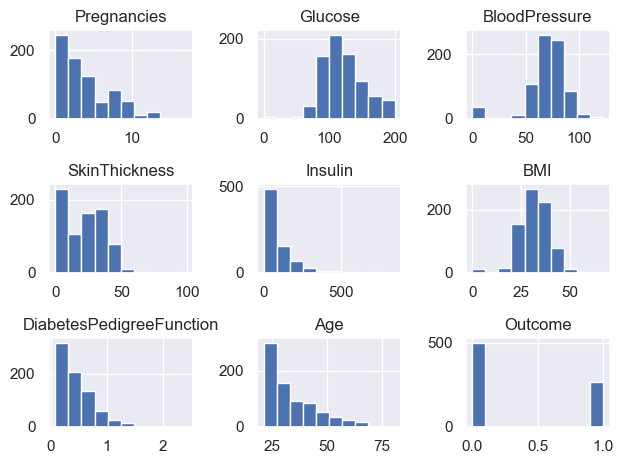

In [8]:
diabetes_data.hist()
plt.tight_layout() 
plt.show()

#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [11]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

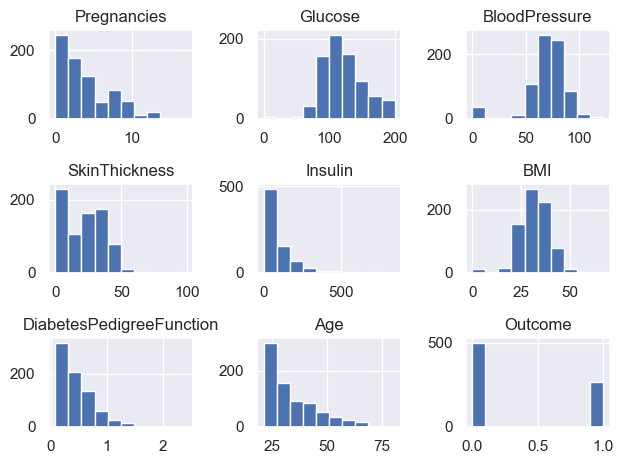

In [10]:
diabetes_data.hist()
plt.tight_layout() 
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


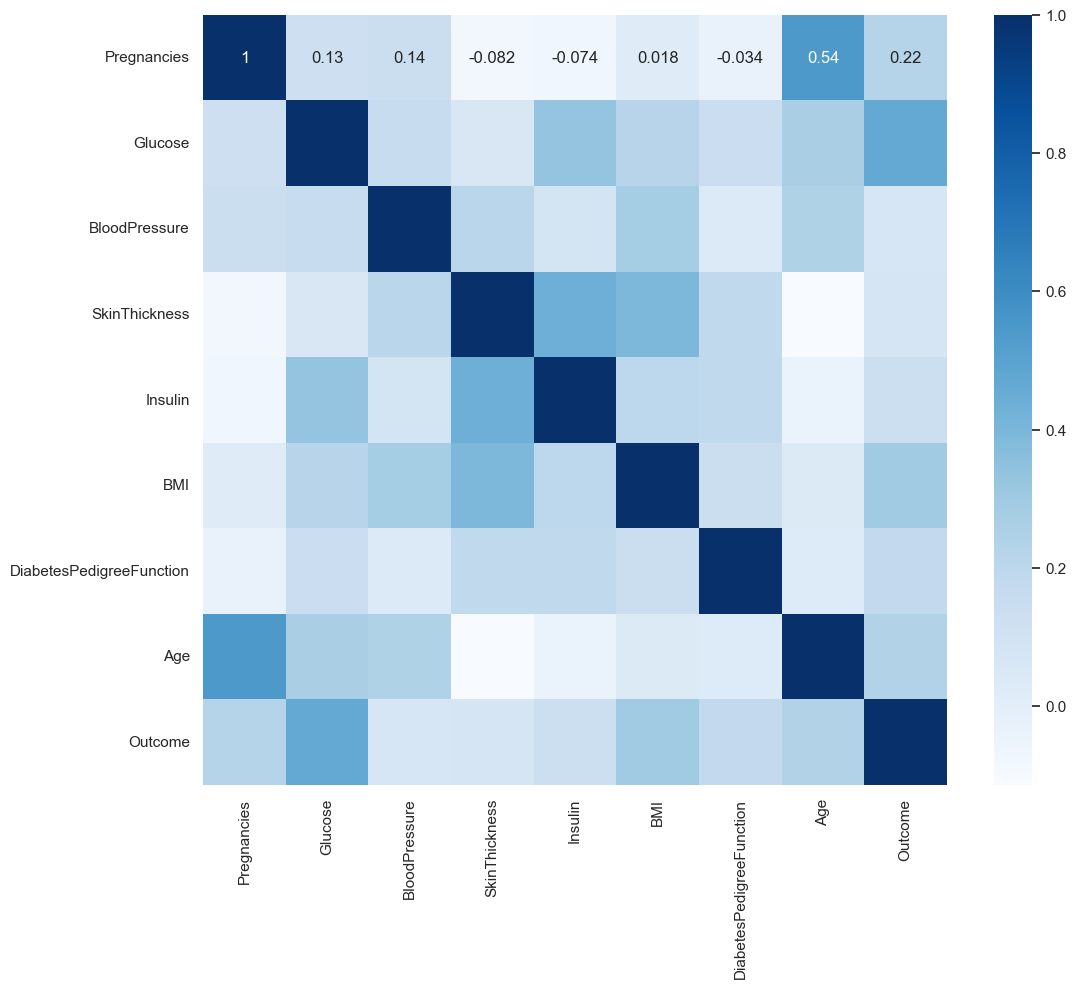

In [20]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [17]:
X = diabetes_data.drop('Outcome', axis =1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [27]:
print("Shapes of resulting train/test split:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, "\n")
print("Data types of resulting train/test split:")
print(X_train.dtypes, X_test.dtypes, y_train.dtypes, y_test.dtypes, "\n")
print("Data types of resulting train/test split:")
print(X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum(), "\n")

Shapes of resulting train/test split:
(537, 8) (231, 8) (537,) (231,) 

Data types of resulting train/test split:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object int64 int64 

Data types of resulting train/test split:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age             

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [31]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_array, columns=X_train.columns, index=X_train.index)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
139,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
485,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
547,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
18,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


In [32]:
scaled_array = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_array, columns=X_test.columns, index=X_test.index)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.697483,-0.707199,-0.646399,0.812079,0.957202,0.265760,-0.116804,0.850192
324,-0.529539,-0.273888,0.293996,0.747464,-0.693688,0.488933,-0.941923,-1.034268
624,-0.529539,-0.397691,-0.314495,-1.320215,-0.693688,-0.154332,-0.912664,-1.034268
690,1.310994,-0.428642,0.570582,-1.320215,-0.693688,-0.968258,1.129653,0.079277
473,1.004239,0.468930,1.123756,-1.320215,-0.693688,-0.272482,-0.760514,1.449793


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [33]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [39]:
print("Model scores on training data for each k:", [print(round(i,2)) for i in train_scores],"\n")
print("Model scores on testing data for each k:", [print(round(i,2)) for i in test_scores],"\n")

1.0
0.86
0.86
0.82
0.82
0.82
0.81
0.82
0.82
Model scores on training data for each k: [None, None, None, None, None, None, None, None, None] 

0.64
0.66
0.71
0.69
0.7
0.69
0.7
0.69
0.7
Model scores on testing data for each k: [None, None, None, None, None, None, None, None, None] 



**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

The first iteration (k = 1), had the largest model score on the training data set

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

The 3rd iteration (k=3), had the largest model score on the testing data set

Plot the train and test model performance by number of neighbors.

/Users/grace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/grace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/grace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/grace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

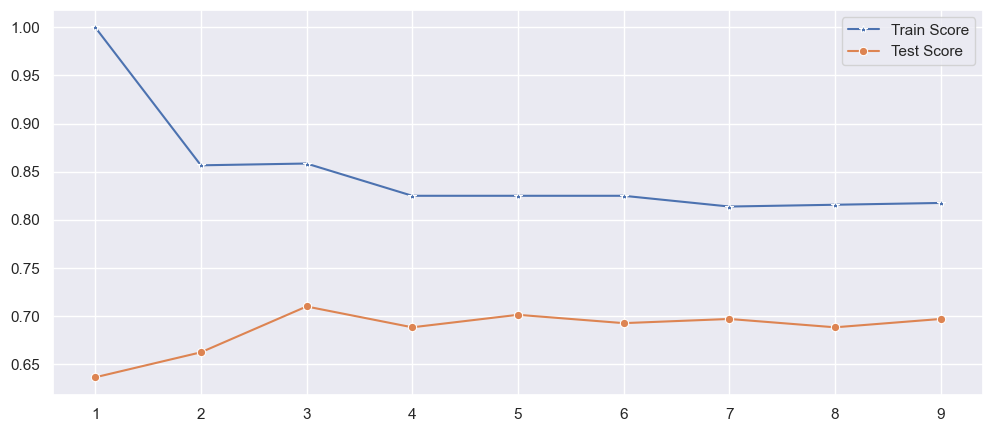

In [41]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x = range(1,10), y= train_scores,marker='*',label='Train Score')
p = sns.lineplot(x= range(1,10),y= test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [45]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)
    
print(round(knn.score(X_train,y_train),2))
print(round(knn.score(X_test,y_test),2))

0.86
0.71


In [46]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [47]:
pl

array([[124,  27],
       [ 40,  40]])

**<font color='teal'> Print the classification report </font>**

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       151
           1       0.60      0.50      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [52]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [53]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [60]:
rf = RandomForestClassifier()
# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[3,5,7,9],
              'min_samples_leaf':[1,3,5],
              'min_samples_split':[2,4,6]
           }

In [61]:
grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)


In [62]:
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

Best grid search hyperparameters are: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Best grid search score is: 0.7914338919925511
